In [90]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from collections import Counter

In [91]:
def ascii_sum(s):
    return np.sum([ord(c) for c in s])

# read origin data
train_data_original = pd.read_csv("data/TRAIN.csv")
val_data_original = pd.read_csv("data/VALIDATION.csv")
test_data_original = pd.read_csv("data/TEST_NO_LABELS.csv")

# add ASCII value of comment at each row
train_data_original['ascii_sum'] = train_data_original['review-text-cleaned'].apply(ascii_sum)
val_data_original['ascii_sum'] = val_data_original['review-text-cleaned'].apply(ascii_sum)
test_data_original['ascii_sum'] = test_data_original['review-text-cleaned'].apply(ascii_sum)

# create backup dataframes without actual comments, also normalization (min-max scaling)
train_data_original_hiddenComment = train_data_original.drop(columns=['review-text-cleaned'])
train_data_original_hiddenComment['ascii_sum'] = (train_data_original_hiddenComment['ascii_sum'] - train_data_original_hiddenComment['ascii_sum'].min()) / (train_data_original_hiddenComment['ascii_sum'].max() - train_data_original_hiddenComment['ascii_sum'].min())

val_data_original_hiddenComment = val_data_original.drop(columns=['review-text-cleaned'])
val_data_original_hiddenComment['ascii_sum'] = (val_data_original_hiddenComment['ascii_sum'] - val_data_original_hiddenComment['ascii_sum'].min()) / (val_data_original_hiddenComment['ascii_sum'].max() - val_data_original_hiddenComment['ascii_sum'].min())

test_data_original_hiddenComment = test_data_original.drop(columns=['review-text-cleaned'])
test_data_original_hiddenComment['ascii_sum'] = (test_data_original_hiddenComment['ascii_sum'] - test_data_original_hiddenComment['ascii_sum'].min()) / (test_data_original_hiddenComment['ascii_sum'].max() - test_data_original_hiddenComment['ascii_sum'].min())


# extract labels from data
train_labels = train_data_original["rating"]
val_labels = val_data_original["rating"]

In [92]:
# read embedding data and drop first column
train_embeddings = pd.read_csv("data/384EMBEDDINGS_TRAIN.csv")
train_embeddings.drop(columns=train_embeddings.columns[0], axis=1, inplace=True)

valid_embeddings = pd.read_csv("data/384EMBEDDINGS_VALIDATION.csv")
valid_embeddings.drop(columns=valid_embeddings.columns[0], axis=1, inplace=True)

test_embeddings = pd.read_csv("data/384EMBEDDINGS_TEST.csv")
test_embeddings.drop(columns=test_embeddings.columns[0], axis=1, inplace=True)

In [93]:
# read tf-idf data and drop first column
train_tfidf = pd.read_csv("data/TFIDF_TRAIN.csv")
train_tfidf.drop(columns=train_tfidf.columns[0], axis=1, inplace=True)

valid_tfidf = pd.read_csv("data/TFIDF_VALIDATION.csv")
valid_tfidf.drop(columns=valid_tfidf.columns[0], axis=1, inplace=True)

test_tfidf = pd.read_csv("data/TFIDF_TEST.csv")
test_tfidf.drop(columns=test_tfidf.columns[0], axis=1, inplace=True)

In [94]:
# baseline classifier

# zero r embedding
ZEROclf = DummyClassifier(strategy="most_frequent")
start = time.time()
ZEROclf.fit(train_embeddings, train_labels)
end = time.time()
print("Zero R embedding, training time: " + str(end-start))
start = time.time()
valid_pred = ZEROclf.predict(valid_embeddings)
end = time.time()
print("Zero R embedding, predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

# one r embedding
RANDOMclf = DummyClassifier(strategy="uniform")
start = time.time()
RANDOMclf.fit(train_embeddings, train_labels)
end = time.time()
print("R embedding, training time (single round): " + str(end-start))
start = time.time()
valid_pred = RANDOMclf.predict(valid_embeddings)
end = time.time()
print("R embedding, predicting time (single round): " + str(end-start))
print(classification_report(val_labels, valid_pred))
random_scores = []
for i in range(10):
    RANDOMclf.fit(train_embeddings, train_labels)
    random_scores.append(RANDOMclf.score(valid_embeddings, val_labels))
print("Random baseline embedding accuracy after 10 rounds", sum(random_scores) / 10.)

#######################################################################################

# zero r tf-idf
ZEROclf = DummyClassifier(strategy="most_frequent")
start = time.time()
ZEROclf.fit(train_tfidf, train_labels)
end = time.time()
print("Zero R tf-idf, training time: " + str(end-start))
start = time.time()
valid_pred = ZEROclf.predict(valid_tfidf)
end = time.time()
print("Zero R tf-idf, predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

# one r tf-idf
RANDOMclf = DummyClassifier(strategy="uniform")
start = time.time()
RANDOMclf.fit(train_tfidf, train_labels)
end = time.time()
print("R tf-idf, training time (single round): " + str(end-start))
start = time.time()
valid_pred = RANDOMclf.predict(valid_tfidf)
end = time.time()
print("R tf-idf, predicting time (single round): " + str(end-start))
print(classification_report(val_labels, valid_pred))
random_scores = []
for i in range(10):
    RANDOMclf.fit(train_tfidf, train_labels)
    random_scores.append(RANDOMclf.score(valid_tfidf, val_labels))
print("Random baseline embedding accuracy after 10 rounds", sum(random_scores) / 10.)

#######################################################################################

# zero r origin data
ZEROclf = DummyClassifier(strategy="most_frequent")
start = time.time()
ZEROclf.fit(train_data_original, train_labels)
end = time.time()
print("Zero R origin, training time: " + str(end-start))
start = time.time()
valid_pred = ZEROclf.predict(val_data_original)
end = time.time()
print("Zero R origin, predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

# one r origin
RANDOMclf = DummyClassifier(strategy="uniform")
start = time.time()
RANDOMclf.fit(train_data_original, train_labels)
end = time.time()
print("R origin, training time (single round): " + str(end-start))
start = time.time()
valid_pred = RANDOMclf.predict(val_data_original)
end = time.time()
print("R origin, predicting time (single round): " + str(end-start))
print(classification_report(val_labels, valid_pred))
random_scores = []
for i in range(10):
    RANDOMclf.fit(train_data_original, train_labels)
    random_scores.append(RANDOMclf.score(val_data_original, val_labels))
print("Random baseline origin accuracy after 10 rounds", sum(random_scores) / 10.)

Zero R embedding, training time: 0.003957271575927734
Zero R embedding, predicting time: 0.003995418548583984
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1462
           1       0.73      1.00      0.85      4038

    accuracy                           0.73      5500
   macro avg       0.37      0.50      0.42      5500
weighted avg       0.54      0.73      0.62      5500

One R embedding, training time (single round): 0.0
One R embedding, predicting time (single round): 0.0
              precision    recall  f1-score   support

          -1       0.28      0.52      0.36      1462
           1       0.75      0.51      0.61      4038

    accuracy                           0.51      5500
   macro avg       0.51      0.52      0.48      5500
weighted avg       0.62      0.51      0.54      5500

Random baseline embedding accuracy after 10 rounds 0.49958181818181807
Zero R tf-idf, training time: 0.003997087478637695
Zero R tf-

D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

#### Supervised Classification ML algorithm and Evaluation

In [95]:
# Multinomial and Gaussian NB in embedding and tf-idf data, also compare training and predicting time

# MNB, tf-idf, alpha 0.1
MNB_clf = MultinomialNB(alpha=0.1)
start = time.time()
MNB_clf.fit(train_tfidf, train_labels)
end = time.time()
print("tf-idf Multinomial Naive Bayes alpha 0.1, training time: " + str(end-start))
start = time.time()
valid_pred = MNB_clf.predict(valid_tfidf)
end = time.time()
print("tf-idf Multinomial Naive Bayes, predicting time: " + str(end - start))
print(classification_report(val_labels, valid_pred))

# MNB, tf-idf alpha 0.2
MNB_clf = MultinomialNB(alpha=0.2)
start = time.time()
MNB_clf.fit(train_tfidf, train_labels)
end = time.time()
print("tf-idf Multinomial Naive Bayes alpha 0.2, training time: " + str(end-start))
start = time.time()
valid_pred = MNB_clf.predict(valid_tfidf)
end = time.time()
print("tf-idf Multinomial Naive Bayes, predicting time: " + str(end - start))
print(classification_report(val_labels, valid_pred))

# MNB, tf-idf alpha 0.3
MNB_clf = MultinomialNB(alpha=0.3)
start = time.time()
MNB_clf.fit(train_tfidf, train_labels)
end = time.time()
print("tf-idf Multinomial Naive Bayes alpha 0.3, training time: " + str(end-start))
start = time.time()
valid_pred = MNB_clf.predict(valid_tfidf)
end = time.time()
print("tf-idf Multinomial Naive Bayes, predicting time: " + str(end - start))
print(classification_report(val_labels, valid_pred))

# MNB, tf-idf alpha 0.4
MNB_clf = MultinomialNB(alpha=0.4)
start = time.time()
MNB_clf.fit(train_tfidf, train_labels)
end = time.time()
print("tf-idf Multinomial Naive Bayes alpha 0.4, training time: " + str(end-start))
start = time.time()
valid_pred = MNB_clf.predict(valid_tfidf)
end = time.time()
print("tf-idf Multinomial Naive Bayes, predicting time: " + str(end - start))
print(classification_report(val_labels, valid_pred))

# MNB, tf-idf alpha 0.5
MNB_clf = MultinomialNB(alpha=0.5)
start = time.time()
MNB_clf.fit(train_tfidf, train_labels)
end = time.time()
print("tf-idf Multinomial Naive Bayes alpha 0.5, training time: " + str(end-start))
start = time.time()
valid_pred = MNB_clf.predict(valid_tfidf)
end = time.time()
print("tf-idf Multinomial Naive Bayes, predicting time: " + str(end - start))
print(classification_report(val_labels, valid_pred))

# MNB, tf-idf alpha 0.6
MNB_clf = MultinomialNB(alpha=0.6)
start = time.time()
MNB_clf.fit(train_tfidf, train_labels)
end = time.time()
print("tf-idf Multinomial Naive Bayes alpha 0.6, training time: " + str(end-start))
start = time.time()
valid_pred = MNB_clf.predict(valid_tfidf)
end = time.time()
print("tf-idf Multinomial Naive Bayes, predicting time: " + str(end - start))
print(classification_report(val_labels, valid_pred))

# MNB, tf-idf alpha 0.7
MNB_clf = MultinomialNB(alpha=0.7)
start = time.time()
MNB_clf.fit(train_tfidf, train_labels)
end = time.time()
print("tf-idf Multinomial Naive Bayes alpha 0.7, training time: " + str(end-start))
start = time.time()
valid_pred = MNB_clf.predict(valid_tfidf)
end = time.time()
print("tf-idf Multinomial Naive Bayes, predicting time: " + str(end - start))
print(classification_report(val_labels, valid_pred))

# MNB, tf-idf alpha 0.8
MNB_clf = MultinomialNB(alpha=0.8)
start = time.time()
MNB_clf.fit(train_tfidf, train_labels)
end = time.time()
print("tf-idf Multinomial Naive Bayes alpha 0.8, training time: " + str(end-start))
start = time.time()
valid_pred = MNB_clf.predict(valid_tfidf)
end = time.time()
print("tf-idf Multinomial Naive Bayes, predicting time: " + str(end - start))
print(classification_report(val_labels, valid_pred))

# MNB, tf-idf alpha 0.9
MNB_clf = MultinomialNB(alpha=0.9)
start = time.time()
MNB_clf.fit(train_tfidf, train_labels)
end = time.time()
print("tf-idf Multinomial Naive Bayes alpha 0.9, training time: " + str(end-start))
start = time.time()
valid_pred = MNB_clf.predict(valid_tfidf)
end = time.time()
print("tf-idf Multinomial Naive Bayes, predicting time: " + str(end - start))
print(classification_report(val_labels, valid_pred))

#######################################################################################

# GNB, tf-idf
GNB_clf = GaussianNB()
start = time.time()
GNB_clf.fit(train_tfidf, train_labels)
end = time.time()
print("tf-idf Gaussian Naive Bayes, training time: " + str(end-start))
start = time.time()
valid_pred = GNB_clf.predict(valid_tfidf)
end = time.time()
print("tf-idf Gaussian Naive Bayes, predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

# GNB, embedding
GNB_clf = GaussianNB()
start = time.time()
GNB_clf.fit(train_embeddings, train_labels)
end = time.time()
print("embeddings Gaussian Naive Bayes, training time: " + str(end-start))
start = time.time()
valid_pred = GNB_clf.predict(valid_embeddings)
end = time.time()
print("embeddings Gaussian Naive Bayes, predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))


# embedding data cannot be used in MNB, as MNB require positive integer
# origin data cannot be used in both GNB and MNB, as the dataset contains negative values

tf-idf Multinomial Naive Bayes alpha 0.1, training time: 0.06585693359375
tf-idf Multinomial Naive Bayes, predicting time: 0.010776996612548828
              precision    recall  f1-score   support

          -1       0.87      0.66      0.75      1462
           1       0.89      0.97      0.92      4038

    accuracy                           0.88      5500
   macro avg       0.88      0.81      0.84      5500
weighted avg       0.88      0.88      0.88      5500

tf-idf Multinomial Naive Bayes alpha 0.2, training time: 0.055933237075805664
tf-idf Multinomial Naive Bayes, predicting time: 0.01591944694519043
              precision    recall  f1-score   support

          -1       0.87      0.66      0.75      1462
           1       0.89      0.97      0.92      4038

    accuracy                           0.88      5500
   macro avg       0.88      0.81      0.84      5500
weighted avg       0.88      0.88      0.88      5500

tf-idf Multinomial Naive Bayes alpha 0.3, training time

In [108]:
# test cell
# GNB_clf = GaussianNB()
# start = time.time()
# GNB_clf.fit(train_data_original_hiddenComment, train_labels)
# end = time.time()
# print("embeddings Gaussian Naive Bayes, training time: " + str(end-start))
# start = time.time()
# valid_pred = GNB_clf.predict(val_data_original_hiddenComment)
# end = time.time()
# print("embeddings Gaussian Naive Bayes, predicting time: " + str(end-start))
# print(classification_report(val_labels, valid_pred))

embeddings Gaussian Naive Bayes, training time: 0.6130189895629883
embeddings Gaussian Naive Bayes, predicting time: 0.04522967338562012
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1462
           1       1.00      1.00      1.00      4038

    accuracy                           1.00      5500
   macro avg       1.00      1.00      1.00      5500
weighted avg       1.00      1.00      1.00      5500



In [96]:
# logistic regression in embedding, tf-idf, origin data
# nearly no change in classification report, minor change in training/predicting time

# 800 iter embedding
LRclf = LogisticRegression(random_state=42, max_iter=800)
start = time.time()
LRclf.fit(train_embeddings, train_labels)
end = time.time()
print("embeddings Logistic Regression (800 iter), training time: " + str(end-start))
start = time.time()
valid_pred = LRclf.predict(valid_embeddings)
end = time.time()
print("embeddings Logistic Regression (800 iter), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

# 700 iter embedding
LRclf = LogisticRegression(random_state=42, max_iter=700)
start = time.time()
LRclf.fit(train_embeddings, train_labels)
end = time.time()
print("embeddings Logistic Regression (700 iter), training time: " + str(end-start))
start = time.time()
valid_pred = LRclf.predict(valid_embeddings)
end = time.time()
print("embeddings Logistic Regression (700 iter), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

# 600 iter embedding
LRclf = LogisticRegression(random_state=42, max_iter=600)
start = time.time()
LRclf.fit(train_embeddings, train_labels)
end = time.time()
print("embeddings Logistic Regression (600 iter), training time: " + str(end-start))
start = time.time()
valid_pred = LRclf.predict(valid_embeddings)
end = time.time()
print("embeddings Logistic Regression (600 iter), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

#######################################################################################

# 800 iter tf-idf
LRclf = LogisticRegression(random_state=42, max_iter=800)
start = time.time()
LRclf.fit(train_tfidf, train_labels)
end = time.time()
print("tf-idf Logistic Regression (800 iter), training time: " + str(end-start))
start = time.time()
valid_pred = LRclf.predict(valid_tfidf)
end = time.time()
print("tf-idf Logistic Regression (800 iter), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

# 700 iter tf-idf
LRclf = LogisticRegression(random_state=42, max_iter=700)
start = time.time()
LRclf.fit(train_tfidf, train_labels)
end = time.time()
print("tf-idf Logistic Regression (700 iter), training time: " + str(end-start))
start = time.time()
valid_pred = LRclf.predict(valid_tfidf)
end = time.time()
print("tf-idf Logistic Regression (700 iter), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

# 600 iter tf-idf
LRclf = LogisticRegression(random_state=42, max_iter=600)
start = time.time()
LRclf.fit(train_tfidf, train_labels)
end = time.time()
print("tf-idf Logistic Regression (600 iter), training time: " + str(end-start))
start = time.time()
valid_pred = LRclf.predict(valid_tfidf)
end = time.time()
print("tf-idf Logistic Regression (600 iter), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

#######################################################################################

# 800 iter origin (over-fitting due to unique ASCII value in each comment)

# overcome over-fitting by using regularization (setting penalty l1)
LRclf = LogisticRegression(penalty='l1', C=1.0, solver='saga', random_state=42, max_iter=800)
start = time.time()
LRclf.fit(train_data_original_hiddenComment, train_labels)
end = time.time()
print("origin(hidden comments) Logistic Regression(penalty l1), training time: " + str(end-start))
start = time.time()
valid_pred = LRclf.predict(val_data_original_hiddenComment)
end = time.time()
print("origin(hidden comments) Logistic Regression(penalty l1), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

# overcome over-fitting by using regularization (setting penalty l2)
LRclf = LogisticRegression(penalty='l2', C=1.0, solver='saga', random_state=42, max_iter=800)
start = time.time()
LRclf.fit(train_data_original_hiddenComment, train_labels)
end = time.time()
print("origin(hidden comments) Logistic Regression(penalty l2), training time: " + str(end-start))
start = time.time()
valid_pred = LRclf.predict(val_data_original_hiddenComment)
end = time.time()
print("origin(hidden comments) Logistic Regression(penalty l2), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

embeddings Logistic Regression (800 iter), training time: 2.216745138168335
embeddings Logistic Regression (800 iter), predicting time: 0.006026268005371094
              precision    recall  f1-score   support

          -1       0.86      0.83      0.85      1462
           1       0.94      0.95      0.95      4038

    accuracy                           0.92      5500
   macro avg       0.90      0.89      0.90      5500
weighted avg       0.92      0.92      0.92      5500

embeddings Logistic Regression (700 iter), training time: 2.2006094455718994
embeddings Logistic Regression (700 iter), predicting time: 0.007990360260009766
              precision    recall  f1-score   support

          -1       0.86      0.83      0.85      1462
           1       0.94      0.95      0.95      4038

    accuracy                           0.92      5500
   macro avg       0.90      0.89      0.90      5500
weighted avg       0.92      0.92      0.92      5500

embeddings Logistic Regression 

D:\Anacoda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

origin(hidden comments) Logistic Regression(penalty l1), training time: 6.375406980514526
origin(hidden comments) Logistic Regression(penalty l1), predicting time: 0.001993417739868164
              precision    recall  f1-score   support

          -1       0.27      1.00      0.42      1462
           1       0.00      0.00      0.00      4038

    accuracy                           0.27      5500
   macro avg       0.13      0.50      0.21      5500
weighted avg       0.07      0.27      0.11      5500

origin(hidden comments) Logistic Regression(penalty l2), training time: 5.7854180335998535
origin(hidden comments) Logistic Regression(penalty l2), predicting time: 0.0019948482513427734
              precision    recall  f1-score   support

          -1       0.27      1.00      0.42      1462
           1       0.00      0.00      0.00      4038

    accuracy                           0.27      5500
   macro avg       0.13      0.50      0.21      5500
weighted avg       0.07      

D:\Anacoda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

In [97]:
# Logistic Regression, adjust class_weight parameter
# the larger weight of 1 (in range 0 to 0.5), the better performance (slightly)

# embedding, balanced
LRclf = LogisticRegression(random_state=42, max_iter=800, class_weight="balanced")
start = time.time()
LRclf.fit(train_embeddings, train_labels)
end = time.time()
print("embedding Logistic Regression (balanced), training time: " + str(end-start))
start = time.time()
valid_pred = LRclf.predict(valid_embeddings)
end = time.time()
print("embedding Logistic Regression (balanced), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

# tf-idf, balanced
LRclf = LogisticRegression(random_state=42, max_iter=800, class_weight="balanced")
start = time.time()
LRclf.fit(train_tfidf, train_labels)
end = time.time()
print("tf-idf Logistic Regression (balanced), training time: " + str(end-start))
start = time.time()
valid_pred = LRclf.predict(valid_tfidf)
end = time.time()
print("tf-idf Logistic Regression (balanced), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

#############################################################################################

weight = {1:0.2, -1:0.8}
# embedding, with weight 1:0.2 and -1:0.8
LRclf = LogisticRegression(random_state=42, max_iter=800, class_weight=weight)
start = time.time()
LRclf.fit(train_embeddings, train_labels)
end = time.time()
print("embedding Logistic Regression (1:0.2 and -1:0.8), training time: " + str(end-start))
start = time.time()
valid_pred = LRclf.predict(valid_embeddings)
end = time.time()
print("embedding Logistic Regression (1:0.2 and -1:0.8), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

# tf-idf, 1:0.2, -1:0.8
LRclf = LogisticRegression(random_state=42, max_iter=800, class_weight=weight)
start = time.time()
LRclf.fit(train_tfidf, train_labels)
end = time.time()
print("tf-idf Logistic Regression (1:0.2 and -1:0.8), training time: " + str(end-start))
start = time.time()
valid_pred = LRclf.predict(valid_tfidf)
end = time.time()
print("tf-idf Logistic Regression (1:0.2 and -1:0.8), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

#############################################################################################

weight = {1:0.3, -1:0.7}
# embedding, with weight 1:0.3 and -1:0.7
LRclf = LogisticRegression(random_state=42, max_iter=800, class_weight=weight)
start = time.time()
LRclf.fit(train_embeddings, train_labels)
end = time.time()
print("embedding Logistic Regression (1:0.3, -1:0.7), training time: " + str(end-start))
start = time.time()
valid_pred = LRclf.predict(valid_embeddings)
end = time.time()
print("embedding Logistic Regression (1:0.3, -1:0.7), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

# tf-idf, 1:0.3, -1:0.7
LRclf = LogisticRegression(random_state=42, max_iter=800, class_weight=weight)
start = time.time()
LRclf.fit(train_tfidf, train_labels)
end = time.time()
print("tf-idf Logistic Regression (1:0.3, -1:0.7), training time: " + str(end-start))
start = time.time()
valid_pred = LRclf.predict(valid_tfidf)
end = time.time()
print("tf-idf Logistic Regression (1:0.3, -1:0.7), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

#############################################################################################

weight = {1:0.4, -1:0.6}
# embedding, with weight 1:0.4, -1:0.6
LRclf = LogisticRegression(random_state=42, max_iter=800, class_weight=weight)
start = time.time()
LRclf.fit(train_embeddings, train_labels)
end = time.time()
print("embedding Logistic Regression (1:0.4, -1:0.6), training time: " + str(end-start))
start = time.time()
valid_pred = LRclf.predict(valid_embeddings)
end = time.time()
print("embedding Logistic Regression (1:0.4, -1:0.6), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

# tf-idf, 1:0.4, -1:0.6
LRclf = LogisticRegression(random_state=42, max_iter=800, class_weight=weight)
start = time.time()
LRclf.fit(train_tfidf, train_labels)
end = time.time()
print("tf-idf Logistic Regression (1:0.4, -1:0.6), training time: " + str(end-start))
start = time.time()
valid_pred = LRclf.predict(valid_tfidf)
end = time.time()
print("tf-idf Logistic Regression (1:0.4, -1:0.6), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

#############################################################################################

# origin, 1:0.4, -1:0.6 (over-fitting due to unique ASCII value in each comment)
LRclf = LogisticRegression(penalty='l2', C=1.0, solver='saga', random_state=42, max_iter=800, class_weight=weight)
start = time.time()
LRclf.fit(train_data_original_hiddenComment, train_labels)
end = time.time()
print("origin Logistic Regression (1:0.4, -1:0.6), training time: " + str(end-start))
start = time.time()
valid_pred = LRclf.predict(val_data_original_hiddenComment)
end = time.time()
print("origin Logistic Regression (1:0.4, -1:0.6), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

embedding Logistic Regression (balanced), training time: 2.1076748371124268
embedding Logistic Regression (balanced), predicting time: 0.010010004043579102
              precision    recall  f1-score   support

          -1       0.77      0.94      0.85      1462
           1       0.98      0.90      0.93      4038

    accuracy                           0.91      5500
   macro avg       0.87      0.92      0.89      5500
weighted avg       0.92      0.91      0.91      5500

tf-idf Logistic Regression (balanced), training time: 1.2545523643493652
tf-idf Logistic Regression (balanced), predicting time: 0.011435747146606445
              precision    recall  f1-score   support

          -1       0.74      0.92      0.82      1462
           1       0.97      0.88      0.92      4038

    accuracy                           0.89      5500
   macro avg       0.85      0.90      0.87      5500
weighted avg       0.91      0.89      0.89      5500

embedding Logistic Regression (1:0.2 and

D:\Anacoda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

In [98]:
# KNN in different neighbors

# 8 neighbors embedding
KNNclf = KNeighborsClassifier(n_neighbors=8, weights='distance', metric='cosine')
start = time.time()
KNNclf.fit(train_embeddings, train_labels)
end = time.time()
print("embeddings KNN (8 neighbors), training time: " + str(end-start))
start = time.time()
valid_pred = KNNclf.predict(valid_embeddings)
end = time.time()
print("embeddings KNN (8 neighbors), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

# 9 neighbors embedding
KNNclf = KNeighborsClassifier(n_neighbors=9, weights='distance', metric='cosine')
start = time.time()
KNNclf.fit(train_embeddings, train_labels)
end = time.time()
print("embeddings KNN (9 neighbors), training time: " + str(end-start))
start = time.time()
valid_pred = KNNclf.predict(valid_embeddings)
end = time.time()
print("embeddings KNN (9 neighbors), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

# 10 neighbors embedding
KNNclf = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='cosine')
start = time.time()
KNNclf.fit(train_embeddings, train_labels)
end = time.time()
print("embeddings KNN (10 neighbors), training time: " + str(end-start))
start = time.time()
valid_pred = KNNclf.predict(valid_embeddings)
end = time.time()
print("embeddings KNN (10 neighbors), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

#############################################################################################

# 8 neighbors tf-idf
KNNclf = KNeighborsClassifier(n_neighbors=8, weights='distance', metric='cosine')
start = time.time()
KNNclf.fit(train_tfidf, train_labels)
end = time.time()
print("tf-idf KNN (8 neighbors), training time: " + str(end-start))
start = time.time()
valid_pred = KNNclf.predict(valid_tfidf)
end = time.time()
print("tf-idf KNN (8 neighbors), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

# 9 neighbors tf-idf
KNNclf = KNeighborsClassifier(n_neighbors=9, weights='distance', metric='cosine')
start = time.time()
KNNclf.fit(train_tfidf, train_labels)
end = time.time()
print("tf-idf KNN (9 neighbors), training time: " + str(end-start))
start = time.time()
valid_pred = KNNclf.predict(valid_tfidf)
end = time.time()
print("tf-idf KNN (9 neighbors), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

# 10 neighbors tf-idf
KNNclf = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='cosine')
start = time.time()
KNNclf.fit(train_tfidf, train_labels)
end = time.time()
print("tf-idf KNN (10 neighbors), training time: " + str(end-start))
start = time.time()
valid_pred = KNNclf.predict(valid_tfidf)
end = time.time()
print("tf-idf KNN (10 neighbors), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

#############################################################################################

# 8 neighbors origin(hidden comments)
KNNclf = KNeighborsClassifier(n_neighbors=8, weights='distance', metric='cosine')
start = time.time()
KNNclf.fit(train_data_original_hiddenComment, train_labels)
end = time.time()
print("origin(hidden comments) KNN (8 neighbors), training time: " + str(end-start))
start = time.time()
valid_pred = KNNclf.predict(val_data_original_hiddenComment)
end = time.time()
print("origin KNN(hidden comments) (8 neighbors), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

# 9 neighbors origin(hidden comments)
KNNclf = KNeighborsClassifier(n_neighbors=9, weights='distance', metric='cosine')
start = time.time()
KNNclf.fit(train_data_original_hiddenComment, train_labels)
end = time.time()
print("origin(hidden comments) KNN (9 neighbors), training time: " + str(end-start))
start = time.time()
valid_pred = KNNclf.predict(val_data_original_hiddenComment)
end = time.time()
print("origin KNN(hidden comments) (9 neighbors), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

# 10 neighbors origin(hidden comments)
KNNclf = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='cosine')
start = time.time()
KNNclf.fit(train_data_original_hiddenComment, train_labels)
end = time.time()
print("origin(hidden comments) KNN (10 neighbors), training time: " + str(end-start))
start = time.time()
valid_pred = KNNclf.predict(val_data_original_hiddenComment)
end = time.time()
print("origin KNN(hidden comments) (10 neighbors), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))


embeddings KNN (8 neighbors), training time: 0.09986758232116699
embeddings KNN (8 neighbors), predicting time: 13.544358968734741
              precision    recall  f1-score   support

          -1       0.84      0.69      0.76      1462
           1       0.90      0.95      0.92      4038

    accuracy                           0.88      5500
   macro avg       0.87      0.82      0.84      5500
weighted avg       0.88      0.88      0.88      5500

embeddings KNN (9 neighbors), training time: 0.7937304973602295
embeddings KNN (9 neighbors), predicting time: 7.636733293533325
              precision    recall  f1-score   support

          -1       0.84      0.69      0.76      1462
           1       0.90      0.95      0.92      4038

    accuracy                           0.88      5500
   macro avg       0.87      0.82      0.84      5500
weighted avg       0.88      0.88      0.88      5500

embeddings KNN (10 neighbors), training time: 0.1732175350189209
embeddings KNN (10 ne

D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


origin KNN(hidden comments) (9 neighbors), predicting time: 2.9079182147979736
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1462
           1       0.73      1.00      0.85      4038

    accuracy                           0.73      5500
   macro avg       0.37      0.50      0.42      5500
weighted avg       0.54      0.73      0.62      5500

origin(hidden comments) KNN (10 neighbors), training time: 0.009181737899780273


D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


origin KNN(hidden comments) (10 neighbors), predicting time: 3.2142648696899414
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1462
           1       0.73      1.00      0.85      4038

    accuracy                           0.73      5500
   macro avg       0.37      0.50      0.42      5500
weighted avg       0.54      0.73      0.62      5500



D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [99]:
# MLPClassifier in different hidden layers

# 200 hidden layer
MLPclf = MLPClassifier(hidden_layer_sizes=200, random_state=42, max_iter=800)
start = time.time()
MLPclf.fit(train_embeddings, train_labels)
end = time.time()
print("embeddings MLPClassifier (200 hidden layer), training time: " + str(end-start))
start = time.time()
valid_pred = MLPclf.predict(valid_embeddings)
end = time.time()
print("embeddings MLPClassifier (200 hidden layer), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

# 300 hidden layer
MLPclf = MLPClassifier(hidden_layer_sizes=300, random_state=42, max_iter=800)
start = time.time()
MLPclf.fit(train_embeddings, train_labels)
end = time.time()
print("embeddings MLPClassifier (300 hidden layer), training time: " + str(end-start))
start = time.time()
valid_pred = MLPclf.predict(valid_embeddings)
end = time.time()
print("embeddings MLPClassifier (300 hidden layer), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

# 400 hidden layer
MLPclf = MLPClassifier(hidden_layer_sizes=400, random_state=42, max_iter=800)
start = time.time()
MLPclf.fit(train_embeddings, train_labels)
end = time.time()
print("embeddings MLPClassifier (400 hidden layer), training time: " + str(end-start))
start = time.time()
valid_pred = MLPclf.predict(valid_embeddings)
end = time.time()
print("embeddings MLPClassifier (400 hidden layer), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

# 500 hidden layer
MLPclf = MLPClassifier(hidden_layer_sizes=500, random_state=42, max_iter=800)
start = time.time()
MLPclf.fit(train_embeddings, train_labels)
end = time.time()
print("embeddings MLPClassifier (500 hidden layer), training time: " + str(end-start))
start = time.time()
valid_pred = MLPclf.predict(valid_embeddings)
end = time.time()
print("embeddings MLPClassifier (500 hidden layer), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

#############################################################################################

# MLPClassifier in different learning rate

# invscaling learning rate
MLPclf = MLPClassifier(hidden_layer_sizes=200, learning_rate='invscaling' ,random_state=42, max_iter=800)
start = time.time()
MLPclf.fit(train_embeddings, train_labels)
end = time.time()
print("embeddings MLPClassifier (invscaling), training time: " + str(end-start))
start = time.time()
valid_pred = MLPclf.predict(valid_embeddings)
end = time.time()
print("embeddings MLPClassifier (invscaling), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

# adaptive learning rate
MLPclf = MLPClassifier(hidden_layer_sizes=200, learning_rate='adaptive' ,random_state=42, max_iter=800)
start = time.time()
MLPclf.fit(train_embeddings, train_labels)
end = time.time()
print("embeddings MLPClassifier (adaptive), training time: " + str(end-start))
start = time.time()
valid_pred = MLPclf.predict(valid_embeddings)
end = time.time()
print("embeddings MLPClassifier (adaptive), predicting time: " + str(end-start))
print(classification_report(val_labels, valid_pred))

embeddings MLPClassifier (200 hidden layer), training time: 177.16714453697205
embeddings MLPClassifier (200 hidden layer), predicting time: 0.03628230094909668
              precision    recall  f1-score   support

          -1       0.85      0.85      0.85      1462
           1       0.94      0.94      0.94      4038

    accuracy                           0.92      5500
   macro avg       0.90      0.90      0.90      5500
weighted avg       0.92      0.92      0.92      5500

embeddings MLPClassifier (300 hidden layer), training time: 263.7728865146637
embeddings MLPClassifier (300 hidden layer), predicting time: 0.13129615783691406
              precision    recall  f1-score   support

          -1       0.84      0.85      0.84      1462
           1       0.94      0.94      0.94      4038

    accuracy                           0.92      5500
   macro avg       0.89      0.89      0.89      5500
weighted avg       0.92      0.92      0.92      5500

embeddings MLPClassifier 

#### Research Question 1: Gender Bias

In [100]:
# male and female data processing (in validation and origin dataset)

# male/female data count in validation dataset
male_data_original = val_data_original_hiddenComment[val_data_original_hiddenComment['dr_id_gender'] == 1]
val_male_label = male_data_original['rating']
female_data_original = val_data_original_hiddenComment[val_data_original_hiddenComment['dr_id_gender'] == 0]
val_female_label = female_data_original['rating']
# all positive/negative comment from male data in validation dataset
male_data_positive = male_data_original[male_data_original['rating'] == 1]
male_data_negative = male_data_original[male_data_original['rating'] == -1]
female_data_positive = female_data_original[female_data_original['rating'] == 1]
female_data_negative = female_data_original[female_data_original['rating'] == -1]
# calculate current gender ratio (male:female) in validation dataset
print("current number of male data (validation): " + str(len(male_data_original)))
print("current number of female data (validation): " + str(len(female_data_original)))
print("current gender ratio (validation): 1 - " + str(len(male_data_original) / len(female_data_original)))

# male/female data count in training dataset
male_data_original_training = train_data_original_hiddenComment[train_data_original_hiddenComment['dr_id_gender'] == 1]
training_male_label = male_data_original_training['rating']
female_data_original_training = train_data_original_hiddenComment[train_data_original_hiddenComment['dr_id_gender'] == 0]
training_female_label = female_data_original_training['rating']
# all positive/negative comment from male data in training dataset
male_data_positive_training = male_data_original_training[male_data_original_training['rating'] == 1]
male_data_negative_training = male_data_original_training[male_data_original_training['rating'] == -1]
female_data_positive_training = female_data_original_training[female_data_original_training['rating'] == 1]
female_data_negative_training = female_data_original_training[female_data_original_training['rating'] == -1]
# calculate current gender ratio (male:female) in training dataset
print("current number of male data (training): " + str(len(male_data_original_training)))
print("current number of female data (training): " + str(len(female_data_original_training)))
print("current gender ratio (training): 1 - " + str(len(male_data_original_training) / len(female_data_original_training)))

current number of male data (validation): 3584
current number of female data (validation): 1497
current gender ratio (validation): 1 - 2.394121576486306
current number of male data (training): 27511
current number of female data (training): 12141
current gender ratio (training): 1 - 2.265958323037641


In [101]:
# male and female data processing (in embedding and tf-idf dataset)

# separate training and validation dataset in male and female on embedding set
training_logical_male = (train_data_original['dr_id_gender'] == 1)
training_logical_female = (train_data_original['dr_id_gender'] == 0)
valid_logical_male = (val_data_original['dr_id_gender'] == 1)
valid_logical_female = (val_data_original['dr_id_gender'] == 0)

embedding_training_male = train_embeddings[training_logical_male]
embedding_training_female = train_embeddings[training_logical_female]
embedding_valid_male = valid_embeddings[valid_logical_male]
embedding_valid_female = valid_embeddings[valid_logical_female]

tfidf_training_male = train_tfidf[training_logical_male]
tfidf_training_female = train_tfidf[training_logical_female]
tfidf_valid_male = valid_tfidf[valid_logical_male]
tfidf_valid_female = valid_tfidf[valid_logical_female]
# print(tfidf_training_male)

positive ratio of male: 0.7257254464285714
negative ratio of male: 0.27427455357142855
positive ratio of female: 0.7381429525718103
negative ratio of female: 0.2618570474281897


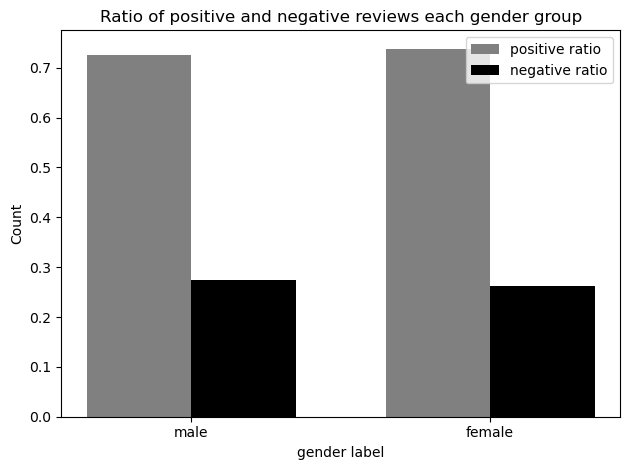

In [102]:
# demonstrate ratio of positive/negative comparison in male and female
# both positive and negative ratio is very similar

bar_width = 0.35
labels = ['male', 'female']
male_positive_ratio = len(male_data_positive) / len(male_data_original)
male_negative_ratio = len(male_data_negative) / len(male_data_original)
female_positive_ratio = len(female_data_positive) / len(female_data_original)
female_negative_ratio = len(female_data_negative) / len(female_data_original)
print("positive ratio of male: " + str(male_positive_ratio))
print("negative ratio of male: " + str(male_negative_ratio))
print("positive ratio of female: " + str(female_positive_ratio))
print("negative ratio of female: " + str(female_negative_ratio))

positive_data_ratio = [male_positive_ratio, female_positive_ratio]
negative_data_ratio = [male_negative_ratio, female_negative_ratio]
index = np.arange(len(labels))
bar1_ratio = plt.bar(index, positive_data_ratio, bar_width, label='positive ratio', color='gray')
bar2_ratio = plt.bar(index + bar_width, negative_data_ratio, bar_width, label='negative ratio', color='black')
plt.title('Ratio of positive and negative reviews each gender group')
plt.xlabel('gender label')
plt.ylabel('Count')
plt.xticks(index + bar_width / 2, labels)  # positioning of group labels in the middle
plt.legend()
plt.tight_layout()
plt.show()

#### Test new data set

In [103]:
# MNB and GNB test on new datasets

# tf-idf
# MNB, new male tf-idf alpha 0.9
# tfidf_training_male_sampled = tfidf_training_male.sample(n=3584, random_state=42)
# tfidf_valid_male_sampled = tfidf_valid_male.sample(n=3584, random_state=42)
# sampled_indices = tfidf_valid_male_sampled.index
# val_labels_sampled = val_labels[sampled_indices]
MNB_clf = MultinomialNB(alpha=0.9)
start = time.time()
MNB_clf.fit(tfidf_training_male, training_male_label)
end = time.time()
print("tf-idf Multinomial Naive Bayes new male, training time: " + str(end-start))
start = time.time()
valid_pred = MNB_clf.predict(tfidf_valid_male)
end = time.time()
print("tf-idf Multinomial Naive Bayes new male, predicting time: " + str(end - start))
print(classification_report(val_male_label, valid_pred))

# # GNB, new male tf-idf
GNB_clf = GaussianNB()
start = time.time()
GNB_clf.fit(tfidf_training_male, training_male_label)
end = time.time()
print("tf-idf Gaussian Naive Bayes new male, training time: " + str(end-start))
start = time.time()
valid_pred = GNB_clf.predict(tfidf_valid_male)
end = time.time()
print("tf-idf Gaussian Naive Bayes new male, predicting time: " + str(end-start))
print(classification_report(val_male_label, valid_pred))

# MNB, new female tf-idf alpha 0.9
# tfidf_training_female_sampled = tfidf_training_female.sample(n=1497, random_state=42)
# tfidf_valid_female_sampled = tfidf_valid_female.sample(n=1497, random_state=42)
# sampled_indices = tfidf_valid_female_sampled.index
# val_labels_sampled = val_labels[sampled_indices]
MNB_clf = MultinomialNB(alpha=0.9)
start = time.time()
MNB_clf.fit(tfidf_training_female, training_female_label)
end = time.time()
print("tf-idf Multinomial Naive Bayes new female, training time: " + str(end-start))
start = time.time()
valid_pred = MNB_clf.predict(tfidf_valid_female)
end = time.time()
print("tf-idf Multinomial Naive Bayes new female, predicting time: " + str(end - start))
print(classification_report(val_female_label, valid_pred))

# GNB, new female tf-idf
GNB_clf = GaussianNB()
start = time.time()
GNB_clf.fit(tfidf_training_female, training_female_label)
end = time.time()
print("tf-idf Gaussian Naive Bayes new female, training time: " + str(end-start))
start = time.time()
valid_pred = GNB_clf.predict(tfidf_valid_female)
end = time.time()
print("tf-idf Gaussian Naive Bayes new female, predicting time: " + str(end-start))
print(classification_report(val_female_label, valid_pred))

#######################################################################################

# embedding
# GNB, male embedding
# embedding_training_male_sampled = embedding_training_male.sample(n=3584, random_state=42)
# embedding_valid_male_sampled = embedding_valid_male.sample(n=3584, random_state=42)
# sampled_indices = embedding_valid_male_sampled.index
# val_labels_sampled = val_labels[sampled_indices]
GNB_clf = GaussianNB()
start = time.time()
GNB_clf.fit(embedding_training_male, training_male_label)
end = time.time()
print("embeddings Gaussian Naive Bayes new male, training time: " + str(end-start))
start = time.time()
valid_pred = GNB_clf.predict(embedding_valid_male)
end = time.time()
print("embeddings Gaussian Naive Bayes new male, predicting time: " + str(end-start))
print(classification_report(val_male_label, valid_pred))

# GNB, female embedding
# embedding_training_female_sampled = embedding_training_female.sample(n=1497, random_state=42)
# embedding_valid_female_sampled = embedding_valid_female.sample(n=1497, random_state=42)
# sampled_indices = embedding_valid_female_sampled.index
# val_labels_sampled = val_labels[sampled_indices]
GNB_clf = GaussianNB()
start = time.time()
GNB_clf.fit(embedding_training_female, training_female_label)
end = time.time()
print("embedding Gaussian Naive Bayes new female, training time: " + str(end-start))
start = time.time()
valid_pred = GNB_clf.predict(embedding_valid_female)
end = time.time()
print("embedding Gaussian Naive Bayes new female, predicting time: " + str(end-start))
print(classification_report(val_female_label, valid_pred))

tf-idf Multinomial Naive Bayes new male, training time: 0.0624542236328125
tf-idf Multinomial Naive Bayes new male, predicting time: 0.015613317489624023
              precision    recall  f1-score   support

          -1       0.90      0.65      0.75       983
           1       0.88      0.97      0.92      2601

    accuracy                           0.88      3584
   macro avg       0.89      0.81      0.84      3584
weighted avg       0.88      0.88      0.88      3584

tf-idf Gaussian Naive Bayes new male, training time: 0.35928988456726074
tf-idf Gaussian Naive Bayes new male, predicting time: 0.0641322135925293
              precision    recall  f1-score   support

          -1       0.69      0.89      0.78       983
           1       0.95      0.85      0.90      2601

    accuracy                           0.86      3584
   macro avg       0.82      0.87      0.84      3584
weighted avg       0.88      0.86      0.87      3584

tf-idf Multinomial Naive Bayes new female, tr

In [104]:
# logistic new datasets

# embedding male
# embedding_training_male_sampled = embedding_training_male.sample(n=3584, random_state=42)
# embedding_valid_male_sampled = embedding_valid_male.sample(n=3584, random_state=42)
# sampled_indices = embedding_valid_male_sampled.index
# val_labels_sampled = val_labels[sampled_indices]
LRclf = LogisticRegression(random_state=42, max_iter=800)
start = time.time()
LRclf.fit(embedding_training_male, training_male_label)
end = time.time()
print("embeddings Logistic Regression (male), training time: " + str(end-start))
start = time.time()
valid_pred = LRclf.predict(embedding_valid_male)
end = time.time()
print("embeddings Logistic Regression (male), predicting time: " + str(end-start))
print(classification_report(val_male_label, valid_pred))

# embedding female
# embedding_training_female_sampled = embedding_training_female.sample(n=1497, random_state=42)
# embedding_valid_female_sampled = embedding_valid_female.sample(n=1497, random_state=42)
# sampled_indices = embedding_valid_female_sampled.index
# val_labels_sampled = val_labels[sampled_indices]
LRclf = LogisticRegression(random_state=42, max_iter=800)
start = time.time()
LRclf.fit(embedding_training_female, training_female_label)
end = time.time()
print("embeddings Logistic Regression (female), training time: " + str(end-start))
start = time.time()
valid_pred = LRclf.predict(embedding_valid_female)
end = time.time()
print("embeddings Logistic Regression (female), predicting time: " + str(end-start))
print(classification_report(val_female_label, valid_pred))

# tf-idf male
# tfidf_training_male_sampled = tfidf_training_male.sample(n=3584, random_state=42)
# tfidf_valid_male_sampled = tfidf_valid_male.sample(n=3584, random_state=42)
# sampled_indices = tfidf_valid_male_sampled.index
# val_labels_sampled = val_labels[sampled_indices]
LRclf = LogisticRegression(random_state=42, max_iter=800)
start = time.time()
LRclf.fit(tfidf_training_male, training_male_label)
end = time.time()
print("tf-idf Logistic Regression (male), training time: " + str(end-start))
start = time.time()
valid_pred = LRclf.predict(tfidf_valid_male)
end = time.time()
print("tf-idf Logistic Regression (male), predicting time: " + str(end-start))
print(classification_report(val_male_label, valid_pred))

# tf-idf female
# tfidf_training_female_sampled = tfidf_training_female.sample(n=1497, random_state=42)
# tfidf_valid_female_sampled = tfidf_valid_female.sample(n=1497, random_state=42)
# sampled_indices = tfidf_valid_female_sampled.index
# val_labels_sampled = val_labels[sampled_indices]
LRclf = LogisticRegression(random_state=42, max_iter=800)
start = time.time()
LRclf.fit(tfidf_training_female, training_female_label)
end = time.time()
print("tf-idf Logistic Regression (female), training time: " + str(end-start))
start = time.time()
valid_pred = LRclf.predict(tfidf_valid_female)
end = time.time()
print("tf-idf Logistic Regression (female), predicting time: " + str(end-start))
print(classification_report(val_female_label, valid_pred))

# origin male
LRclf = LogisticRegression(penalty='l1', C=1.0, solver='saga', random_state=42, max_iter=800)
start = time.time()
LRclf.fit(male_data_original_training, training_male_label)
end = time.time()
print("origin(male) Logistic Regression(penalty l1), training time: " + str(end-start))
start = time.time()
valid_pred = LRclf.predict(male_data_original)
end = time.time()
print("origin(male) Logistic Regression(penalty l1), predicting time: " + str(end-start))
print(classification_report(val_male_label, valid_pred))

# origin female
LRclf = LogisticRegression(penalty='l1', C=1.0, solver='saga', random_state=42, max_iter=800)
start = time.time()
LRclf.fit(female_data_original_training, training_female_label)
end = time.time()
print("origin(female) Logistic Regression(penalty l1), training time: " + str(end-start))
start = time.time()
valid_pred = LRclf.predict(female_data_original)
end = time.time()
print("origin(female) Logistic Regression(penalty l1), predicting time: " + str(end-start))
print(classification_report(val_female_label, valid_pred))

embeddings Logistic Regression (male), training time: 1.126455545425415
embeddings Logistic Regression (male), predicting time: 0.0
              precision    recall  f1-score   support

          -1       0.85      0.87      0.86       983
           1       0.95      0.94      0.95      2601

    accuracy                           0.92      3584
   macro avg       0.90      0.91      0.90      3584
weighted avg       0.92      0.92      0.92      3584

embeddings Logistic Regression (female), training time: 0.4252195358276367
embeddings Logistic Regression (female), predicting time: 0.015585899353027344
              precision    recall  f1-score   support

          -1       0.83      0.90      0.86       392
           1       0.96      0.93      0.95      1105

    accuracy                           0.92      1497
   macro avg       0.89      0.91      0.90      1497
weighted avg       0.93      0.92      0.92      1497

tf-idf Logistic Regression (male), training time: 1.23065805

D:\Anacoda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

origin(male) Logistic Regression(penalty l1), training time: 3.8581392765045166
origin(male) Logistic Regression(penalty l1), predicting time: 0.0
              precision    recall  f1-score   support

          -1       0.27      1.00      0.43       983
           1       0.00      0.00      0.00      2601

    accuracy                           0.27      3584
   macro avg       0.14      0.50      0.22      3584
weighted avg       0.08      0.27      0.12      3584

origin(female) Logistic Regression(penalty l1), training time: 1.6086673736572266
origin(female) Logistic Regression(penalty l1), predicting time: 0.0
              precision    recall  f1-score   support

          -1       0.26      1.00      0.42       392
           1       0.00      0.00      0.00      1105

    accuracy                           0.26      1497
   macro avg       0.13      0.50      0.21      1497
weighted avg       0.07      0.26      0.11      1497



D:\Anacoda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

In [105]:
# KNN new datasets

# KNN tf-idf male
KNNclf = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='cosine')
start = time.time()
KNNclf.fit(tfidf_training_male, training_male_label)
end = time.time()
print("tfidf(male) KNN, training time: " + str(end-start))
start = time.time()
valid_pred = KNNclf.predict(tfidf_valid_male)
end = time.time()
print("tfidf(male) KNN, predicting time: " + str(end-start))
print(classification_report(val_male_label, valid_pred))

# KNN tf-idf female
KNNclf = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='cosine')
start = time.time()
KNNclf.fit(tfidf_training_female, training_female_label)
end = time.time()
print("tfidf(female) KNN, training time: " + str(end-start))
start = time.time()
valid_pred = KNNclf.predict(tfidf_valid_female)
end = time.time()
print("tfidf(female) KNN, predicting time: " + str(end-start))
print(classification_report(val_female_label, valid_pred))

# KNN embedding male
KNNclf = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='cosine')
start = time.time()
KNNclf.fit(embedding_training_male, training_male_label)
end = time.time()
print("embedding(male) KNN, training time: " + str(end-start))
start = time.time()
valid_pred = KNNclf.predict(embedding_valid_male)
end = time.time()
print("embedding(male) KNN, predicting time: " + str(end-start))
print(classification_report(val_male_label, valid_pred))

# KNN embedding female
KNNclf = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='cosine')
start = time.time()
KNNclf.fit(embedding_training_female, training_female_label)
end = time.time()
print("embedding(female) KNN, training time: " + str(end-start))
start = time.time()
valid_pred = KNNclf.predict(embedding_valid_female)
end = time.time()
print("embedding(female) KNN, predicting time: " + str(end-start))
print(classification_report(val_female_label, valid_pred))

# KNN origin male
KNNclf = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='cosine')
start = time.time()
KNNclf.fit(male_data_original_training, training_male_label)
end = time.time()
print("origin(male) KNN, training time: " + str(end-start))
start = time.time()
valid_pred = KNNclf.predict(male_data_original)
end = time.time()
print("origin(male) KNN, predicting time: " + str(end-start))
print(classification_report(val_male_label, valid_pred))

# KNN origin female
KNNclf = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='cosine')
start = time.time()
KNNclf.fit(female_data_original_training, training_female_label)
end = time.time()
print("origin(female) KNN, training time: " + str(end-start))
start = time.time()
valid_pred = KNNclf.predict(female_data_original)
end = time.time()
print("origin(female) KNN, predicting time: " + str(end-start))
print(classification_report(val_female_label, valid_pred))

tfidf(male) KNN, training time: 0.09370255470275879
tfidf(male) KNN, predicting time: 4.556760787963867
              precision    recall  f1-score   support

          -1       0.79      0.62      0.70       983
           1       0.87      0.94      0.90      2601

    accuracy                           0.85      3584
   macro avg       0.83      0.78      0.80      3584
weighted avg       0.85      0.85      0.85      3584

tfidf(female) KNN, training time: 0.10538363456726074
tfidf(female) KNN, predicting time: 1.0628578662872314
              precision    recall  f1-score   support

          -1       0.75      0.60      0.67       392
           1       0.87      0.93      0.90      1105

    accuracy                           0.84      1497
   macro avg       0.81      0.77      0.78      1497
weighted avg       0.84      0.84      0.84      1497

embedding(male) KNN, training time: 0.16371560096740723
embedding(male) KNN, predicting time: 3.065330743789673
              precisi

D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


origin(female) KNN, predicting time: 0.3072056770324707
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       392
           1       0.74      1.00      0.85      1105

    accuracy                           0.74      1497
   macro avg       0.37      0.50      0.42      1497
weighted avg       0.54      0.74      0.63      1497



D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anacoda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
# MLP new datasets

# MPL embedding male
MLPclf = MLPClassifier(hidden_layer_sizes=300, random_state=42, max_iter=800)
start = time.time()
MLPclf.fit(embedding_training_male, training_male_label)
end = time.time()
print("embeddings MLPClassifier (male), training time: " + str(end-start))
start = time.time()
valid_pred = MLPclf.predict(embedding_valid_male)
end = time.time()
print("embeddings MLPClassifier (male), predicting time: " + str(end-start))
print(classification_report(val_male_label, valid_pred))

# MPL embedding female
MLPclf = MLPClassifier(hidden_layer_sizes=300, random_state=42, max_iter=800)
start = time.time()
MLPclf.fit(embedding_training_female, training_female_label)
end = time.time()
print("embeddings MLPClassifier (female), training time: " + str(end-start))
start = time.time()
valid_pred = MLPclf.predict(embedding_valid_female)
end = time.time()
print("embeddings MLPClassifier (female), predicting time: " + str(end-start))
print(classification_report(val_female_label, valid_pred))

embeddings MLPClassifier (male), training time: 138.21787476539612
embeddings MLPClassifier (male), predicting time: 0.06443476676940918
              precision    recall  f1-score   support

          -1       0.87      0.81      0.84       983
           1       0.93      0.95      0.94      2601

    accuracy                           0.91      3584
   macro avg       0.90      0.88      0.89      3584
weighted avg       0.91      0.91      0.91      3584

embeddings MLPClassifier (female), training time: 81.72404193878174
embeddings MLPClassifier (female), predicting time: 0.017832517623901367
              precision    recall  f1-score   support

          -1       0.85      0.89      0.87       392
           1       0.96      0.94      0.95      1105

    accuracy                           0.93      1497
   macro avg       0.90      0.92      0.91      1497
weighted avg       0.93      0.93      0.93      1497



In [107]:
# kaggle

MLPclf = MLPClassifier(hidden_layer_sizes=300, random_state=42, max_iter=800)

MLPclf.fit(train_embeddings, train_labels)
valid_pred = MLPclf.predict(test_embeddings)
print(len(valid_pred))
assert test_data_original_hiddenComment.shape[0] == len(valid_pred)

fout = open("kaggle_test.csv", "w")
fout.write("id, rating\n")
for idx, pred in enumerate(valid_pred):
    fout.write(f"{idx},{pred}\n")
fout.close()


